In [1]:
# Basic libs first
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pickle

# Scikit ones now
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
# import the bbc dataset
dataset = pd.read_csv(r"D:\Sana\SRM\python_projects\Notebooks\text_classifier_classicalalgos\data\bbc_news_train.csv")
dataset.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [3]:
# Print to see the first text of the dataset
dataset['Text'][0]

'worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness.  cynthia cooper  worldcom s ex-head of internal accounting  alerted directors to irregular accounting practices at the us telecoms giant in 2002. her warnings led to the collapse of the firm following the discovery of an $11bn (£5.7bn) accounting fraud. mr ebbers has pleaded not guilty to charges of fraud and conspiracy.  prosecution lawyers have argued that mr ebbers orchestrated a series of accounting tricks at worldcom  ordering employees to hide expenses and inflate revenues to meet wall street earnings estimates. but ms cooper  who now runs her own consulting business  told a jury in new york on wednesday that external auditors arthur andersen had approved worldcom s accounting in early 2001 and 2002. she said andersen had given a  green light  to the procedures and practices used by worldcom. mr ebb

In [4]:
# View the shape of the dataset
dataset.shape

(1490, 3)

In [5]:
# Check on info for the 3 columns of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.1+ KB


In [6]:
# Check for missing data. In case there is any, we will need to take further action
missing_data = dataset.isnull().sum()
missing_data

ArticleId    0
Text         0
Category     0
dtype: int64

In [7]:
# Now check if we have a good balane across all the categories. If not, we need to take further action
dataset['Category'].value_counts()

Category
sport            346
business         336
politics         274
entertainment    273
tech             261
Name: count, dtype: int64

In [8]:
# View the category column values
target_category = dataset['Category'].unique()
print(target_category)

['business' 'tech' 'politics' 'sport' 'entertainment']


In [9]:
# The category column needs to hold numbers instead of text. Use the LabelEncoder to peform this
le = LabelEncoder()
dataset['CategoryId'] = le.fit_transform(dataset['Category'])
dataset.head()

,ArticleId,Text,Category,CategoryId
0,1833,worldcom ex-boss launches defence lawyers defe...,business,0
1,154,german business confidence slides german busin...,business,0
2,1101,bbc poll indicates economic gloom citizens in ...,business,0
3,1976,lifestyle governs mobile choice faster bett...,tech,4
4,917,enron bosses in $168m payout eighteen former e...,business,0


In [10]:
target_category = dataset['CategoryId'].unique()
print(target_category)

[0 4 2 3 1]


<Axes: xlabel='Category'>

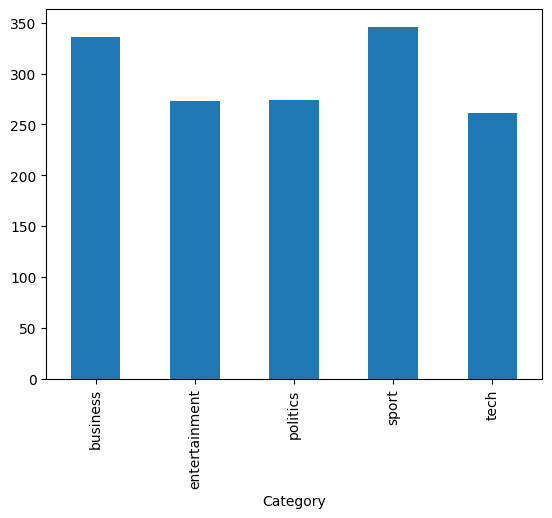

In [11]:
# View the categories in a bar graph form
dataset.groupby('Category').CategoryId.count().plot.bar(ylim = 0)

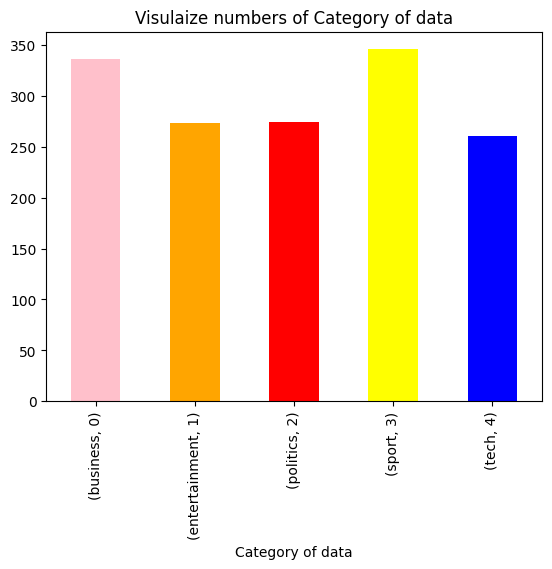

In [12]:
# Another way to visualize
dataset.groupby('Category').CategoryId.value_counts().plot(kind = "bar", color = ["pink", "orange", "red", "yellow", "blue"])
plt.xlabel("Category of data")
plt.title("Visulaize numbers of Category of data")
plt.show()

In [13]:
category = dataset['Category']
category.head(10)

0         business
1         business
2         business
3             tech
4         business
5         politics
6            sport
7    entertainment
8         business
9    entertainment
Name: Category, dtype: object

In [14]:
# Helper functions for data cleaning
def to_lowercase(text):
    return str(text).lower()

def remove_html_and_urls(text):
    # Remove HTML tags
    clean = re.sub(r'<.*?>', '', text)
    
    # Remove URLs
    clean = re.sub(r'https?://\S+|www\.\S+', '', clean)
    return clean

def remove_special_chars(text):
  reviews = ''
    
  for x in text:
    if x.isalnum():
      reviews = reviews + x
    else:
      reviews = reviews + ' '
  return reviews
        
def remove_extra_whitespace(text):
    # Replaces multiple spaces with a single space and strips leading/trailing spaces
    clean = re.sub(r'\\s+', ' ', text).strip()
    return clean

In [15]:
# Call the functions
dataset['Text'] = dataset['Text'].apply(to_lowercase)
dataset['Text'] = dataset['Text'].apply(remove_html_and_urls)
dataset['Text'] = dataset['Text'].apply(remove_special_chars)
dataset['Text'] = dataset['Text'].apply(remove_extra_whitespace)


In [16]:
# View a sample data
dataset['Text'][0]

'worldcom ex boss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness   cynthia cooper  worldcom s ex head of internal accounting  alerted directors to irregular accounting practices at the us telecoms giant in 2002  her warnings led to the collapse of the firm following the discovery of an  11bn   5 7bn  accounting fraud  mr ebbers has pleaded not guilty to charges of fraud and conspiracy   prosecution lawyers have argued that mr ebbers orchestrated a series of accounting tricks at worldcom  ordering employees to hide expenses and inflate revenues to meet wall street earnings estimates  but ms cooper  who now runs her own consulting business  told a jury in new york on wednesday that external auditors arthur andersen had approved worldcom s accounting in early 2001 and 2002  she said andersen had given a  green light  to the procedures and practices used by worldcom  mr ebb

In [17]:
dataset.head()

,ArticleId,Text,Category,CategoryId
0,1833,worldcom ex boss launches defence lawyers defe...,business,0
1,154,german business confidence slides german busin...,business,0
2,1101,bbc poll indicates economic gloom citizens in ...,business,0
3,1976,lifestyle governs mobile choice faster bett...,tech,4
4,917,enron bosses in 168m payout eighteen former e...,business,0


In [18]:
# Now do the split of data into train and test slots - as usual, the test will be 20% of all the data
X_train, X_test, y_train, y_test = train_test_split(
    dataset['Text'], dataset['CategoryId'], test_size=0.2, random_state=42
)

In [19]:
# Check the shape of the training and testing sets
X_train.shape, X_test.shape

((1192,), (298,))

In [20]:
# Define multiple pipelines and run them to find the best accuracy among them
pipeline_knn=Pipeline([
     ('tfidf', TfidfVectorizer()),    
     ('clf', KNeighborsClassifier())
])

pipeline_lr = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression())
])

pipeline_nb = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB())
])

pipeline_svc = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LinearSVC())
])

pipeline_dt = Pipeline([
     ('tfidf', TfidfVectorizer()),    
     ('decision_tree', DecisionTreeClassifier())
])

pipeline_rf = Pipeline([
     ('tfidf', TfidfVectorizer()),    
     ('Random Forest', RandomForestClassifier())
])

pipelines = [pipeline_knn, pipeline_lr, pipeline_nb, pipeline_svc, pipeline_dt, pipeline_rf]
best_accuracy = 0
best_pipeline = ""

# Train and evaluate each pipeline
for pipe in pipelines:
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy for pipe {0} is: {1}".format(pipe,accuracy))

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_pipeline = pipe
        
    #print(classification_report(y_test, y_pred)
print("Best model is {0} with accuracy {1}".format(best_pipeline, best_accuracy))


Accuracy for pipe Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', KNeighborsClassifier())]) is: 0.9362416107382551
Accuracy for pipe Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LogisticRegression())]) is: 0.9664429530201343
Accuracy for pipe Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())]) is: 0.9530201342281879
Accuracy for pipe Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())]) is: 0.9798657718120806
Accuracy for pipe Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('decision_tree', DecisionTreeClassifier())]) is: 0.7651006711409396
Accuracy for pipe Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('Random Forest', RandomForestClassifier())]) is: 0.9697986577181208
Best model is Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())]) with accuracy 0.9798657718120806


In [21]:
# Now that we have our best model, pickle it
# Save model in the predefined location
with open('best_model/text_classification_model.pkl', 'wb') as f:
    pickle.dump(pipeline_svc, f)